# PSU IST 597.001: Homework 2
## Differential Privacy

### Instructions
This assignment follows the same principles as our hands-on in-class activities, and centers around concepts we've discussed in our differential privacy module.

To ensure that the notebook runs, I've defined a function your_code_here() that simply returns the number 1. Whenever you see a call to this function, you should replace it with code you have written. Please make sure all cells of your notebook run without error before submitting the assignment. If you have not completed all the questions, leave calls to your_code_here() in place or insert dummy values so that the cell does not throw an error when it runs.

When answering non-code questions, feel free to use a comment, or put the cell in Markdown mode and use Markdown.
The point value of each question is listed with the question, and these add up to 100 points. The assignment is due by 9:00am on Wednesdsay, March 25. When you have finished your assignment, please submit it via Canvas.

In [5]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

### Preamble

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import pandas as pd
import numpy as np

# Our usual dataset

adult_data = pd.read_csv("adult_with_pii.csv")
adult_data['DOB'] = pd.to_datetime(adult_data['DOB'], errors='coerce')

# Some useful utilities from earlier assignments

def laplace_mech(v, sensitivity, epsilon):
    return v + np.random.laplace(loc=0, scale=sensitivity / epsilon)

def pct_error(orig, priv):
    orig = np.array(orig)
    return np.abs(orig - priv)/orig * 100.0

def your_code_here():
    return 1
adult_data.head()

,Name,DOB,SSN,Zip,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
0,Karrie Trusslove,1967-09-07,732-14-6110,64152,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Brandise Tripony,1988-06-07,150-19-2766,61523,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Brenn McNeely,1991-08-06,725-59-9860,95668,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Dorry Poter,2009-04-06,659-57-4974,25503,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Dick Honnan,1951-09-16,220-93-3811,75387,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Collaboration Statement

**You are expected to work indepdently on this assignment.** Everyone should write their *own code and responses*. You may collaborate with a classmate through *high level* discussions (only). To the extent that you do so, please describe this in the collaboration statment below.

In [7]:
# In this cell (in markdown or a comment) write your collaboration statement
# I'm working alone.

### Question 1 (1 point)

Write code to answer the following query:

`For each marital status in the census data, how many participants had that status?`

*Note*: "marital status" is misspelled as `Martial Status` in the column names.

*Hint*: use `unique()` to obtain the set of unique values in a column, and use `shape[0]` to count the number of rows in a dataframe.

In [8]:
print("Below is the frequency distribution of Marital status")
adult_data['Martial Status'].value_counts()

Below is the frequency distribution of Marital status


Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: Martial Status, dtype: int64

>> +1 point

### Question 2 (3 points)

Write code to return a differentially private version of your result from the last question. Use the definition of `laplace_mech` above.

In [9]:
# Setting sensitivity = 1, and Epsilon = 0.1
adult_data['Martial Status'].value_counts().apply(lambda x: laplace_mech(x, 1, 0.1))

Married-civ-spouse       14979.928882
Never-married            10681.445681
Divorced                  4434.737986
Separated                 1016.466812
Widowed                    997.397318
Married-spouse-absent      401.220370
Married-AF-spouse           59.366234
Name: Martial Status, dtype: float64

>> +3 points

### Question 3 (3 points)

In the cell below, answer the following in 3-5 sentences:
- What is the privacy cost of your answer to the last question, and why?
- Does it violate privacy to release the set of unique marital status categories (i.e. the "histogram bin labels"), as we do here? Why or why not? 
- Is the answer to the above point the same for every dataset?

In [10]:
# In this cell (in markdown or a comment) write your reponses.
# Privacy cost is the chosen Epsilon (0.1). This is because of parallel composition. Individuals can only
# have one marital status at a time. Hence, no two chunks have the same individual.
# It does not violate privacy if we release the data in form of label:counts format. Reason being,
# every bin has more than one count. 
# Consider dataset with some bin size = 1. Then, say the one-differ dataset has this row removed. 
# Now number of bins do decrease and the included/excluded row can be identified.

>> +3 points

### Question 4 (5 points)

Fill in the following code block to produce graphs of the percent error introduced for each count. Your code should compute 100 differentially private answers for each marital status, then run `pct_error` on each answer to compute the percent error of that answer. The remaining code will plot histograms of the results for each status.

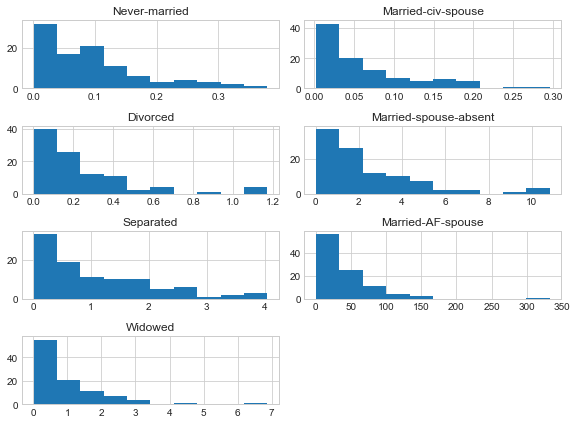

In [11]:
fig = plt.figure()
fig.set_size_inches(8, 6)
# Setting sensitivity = 1, epsilon = 0.1
dom = adult_data['Martial Status'].unique()
for status,num in zip(dom, range(1, len(dom)+1)):
    orig_vals = [len(adult_data[adult_data['Martial Status'] == status]) for i in range(100)]
    distorted_values = [laplace_mech(x, 1, 0.1) for x in orig_vals]
    errors = pct_error(orig_vals, distorted_values)
    ax = fig.add_subplot(4,2,num)
    ax.hist(errors, bins=10)
    ax.set_title(status)

plt.tight_layout()
plt.show()

>> +5 points

### Question 5 (3 points)

In 3-5 sentences, answer the following:
- Which marital status tends to have the largest error? Which one has the smallest error?
- What is the reason for this discrepency?
- Describe a rule of thumb for deciding when a differentially private counting query will yield an accurate result.

In [12]:
# In this cell (in markdown or a comment) write your reponses.
# Largest Error: Married-AF-Spouse - Very few people (Weak signal)
# Smallest Error: Married-civ-spouse - More number of people (Strong signal)
# The discrepancy is because of the relative counts. Married-AF-Spouse has 23 people,
# Married-civ-spouse has 14,976 people. Larger counts are strong signals and tough to disrupt by adding 
# small noise. On the other hand, shorter counts get disrupted easily by adding weak noise.
# rule of thumb: Accuracy is directly proportional to count (signal strength).

>> +3 points

### Question 6 (2 points)

Build a [contingency table](https://en.wikipedia.org/wiki/Contingency_table) between the `Martial Status` and `Sex` columns of the `adult_data` dataframe.

*Note*: "marital status" is misspelled as `Martial Status` in the column names.

*Hint*: use `pd.crosstab(..., ...)` (documentation [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)).

In [13]:
ct_ms_s = pd.crosstab(adult_data['Martial Status'], adult_data['Sex'])
ct_ms_s

Sex,Female,Male
Martial Status,,
Divorced,2672,1771
Married-AF-spouse,14,9
Married-civ-spouse,1657,13319
Married-spouse-absent,205,213
Never-married,4767,5916
Separated,631,394
Widowed,825,168


>> +2 points

### Question 7 (3 points)

Write code to build a differentially private version of your result from the last question.

*Hint*: use `applymap`.

In [14]:
# using sensitivity = 1, epsilon = 0.1
dp_ct_ms_s = ct_ms_s.applymap(lambda x: laplace_mech(x, 1, 0.1))
dp_ct_ms_s

Sex,Female,Male
Martial Status,,
Divorced,2652.153281,1780.568234
Married-AF-spouse,9.475568,3.653094
Married-civ-spouse,1661.153620,13326.963894
Married-spouse-absent,185.479138,211.239261
Never-married,4770.595088,5919.122067
Separated,641.961629,398.996501
Widowed,844.295320,162.509056


>> +3 points

### Question 8 (5 points)

Write code to display a table containing percent errors for each of the cells in your answer to the last question.

*Hint*: use `applymap` and `pct_error` on your answer to the last question.

In [15]:
print("Note: An easier method is to apply pct_error like this: ")
print("ct_ms_s.applymap(lambda x: pct_error(x, laplace_mech(x, 1, 0.1)))")
print("This is wrong because, the question asks to display errors for the previous table results (Q7)")
print("If I run above then I'm invoking Laplace again and it results in a new set of values")
print("........................................................................................")
print("Percentage errors of DP results of the previous question")
print("----------------------------------------------------------------------------------------")
print('{:24}    {:24}    {:24}'.format("Marital Status", "Female", "Male"))
print("----------------------------------------------------------------------------------------")
for index, row in dp_ct_ms_s.iterrows():
    orig_count_female = ct_ms_s.loc[index, 'Female']
    orig_count_male = ct_ms_s.loc[index, 'Male']
    pct_error_female = pct_error(orig_count_female, row['Female'])
    pct_error_male = pct_error(orig_count_male, row['Male'])
    print('{:24}    {:24}    {:24}'.format(index, str(pct_error_female), str(pct_error_male)))

Note: An easier method is to apply pct_error like this: 
ct_ms_s.applymap(lambda x: pct_error(x, laplace_mech(x, 1, 0.1)))
This is wrong because, the question asks to display errors for the previous table results (Q7)
If I run above then I'm invoking Laplace again and it results in a new set of values
........................................................................................
Percentage errors of DP results of the previous question
----------------------------------------------------------------------------------------
Marital Status              Female                      Male                    
----------------------------------------------------------------------------------------
Divorced                    0.7427664147772923          0.5402729387557736      
Married-AF-spouse           32.317371843253035          59.41007030917906       
Married-civ-spouse          0.2506710878838688          0.059793486696375596    
Married-spouse-absent       9.52237157767129     

>> +5 points

### Question 9 (3 points)

In 3-5 sentences, answer the following:
- What is the privacy cost of your answer to the last question?
- For which cells does your solution produce accurate results? For which cells does it produce results with high error?

In [16]:
# In this cell (in markdown or a comment) write your reponses.
# Privacy cost is the chosen Epsilon (0.1). This is due to parallel composition 
# and also the differential privacy is shielded by post processing. 
# Accurate results are produced for cells with least error (high count). Married-civ-spouse, Male. 
# High errors are induced on cells with lesser count (Married-AF-Spouse, Female and Male )

>> +3 points

### Question 10 (5 points)

Write code to produce a differentially private contingency table for three variables: `Martial Status`, `Sex`, and `Education`. Also write code to display the percent error for each cell in your table.

*Hint*: see the documentation of `crosstab` for an example of a 3-variable contingency table.

In [17]:
print("Contingency Table with Original Counts")
mse = pd.crosstab([adult_data['Education'], adult_data['Sex']], adult_data['Martial Status'])
mse

Contingency Table with Original Counts


Martial Status       Divorced  Married-AF-spouse  Married-civ-spouse  \
Education    Sex                                                       
10th         Female        67                  0                  33   
             Male          53                  0                 316   
11th         Female        79                  0                  35   
             Male          51                  0                 319   
12th         Female        17                  0                  20   
             Male          22                  0                 110   
1st-4th      Female         5                  0                   6   
             Male           5                  0                  75   
5th-6th      Female        10                  0                  18   
             Male          10                  0                 154   
7th-8th      Female        33                  0                  23   
             Male          40                  0                 336   
9th          Female        35                  0                  22   
             Male          29                  0                 208   
Assoc-acdm   Female       136                  2                  77   
             Male          67                  0                 383   
Assoc-voc    Female       153                  0                  93   
             Male          81                  1                 596   
Bachelors    Female       295                  2                 311   
             Male         251                  2                2457   
Doctorate    Female        20                  0                  20   
             Male          13                  0                 266   
HS-grad      Female       937                  8                 533   
             Male         676                  5                4312   
Masters      Female       153                  0                 113   
             Male          80                  0                 890   
Preschool    Female         0                  0                   3   
             Male           1                  0                  17   
Prof-school  Female        21                  0                  27   
             Male          34                  0                 385   
Some-college Female       711                  2                 323   
             Male         358                  1                2495   

Martial Status       Married-spouse-absent  Never-married  Separated  Widowed  
Education    Sex                                                               
10th         Female                      7            128         31       29  
             Male                        8            233         18       10  
11th         Female                      7            248         28       35  
             Male                       12            338         20        3  
12th         Female                      4             84         12        7  
             Male                        4            148          2        3  
1st-4th      Female                      3             12          5       15  
             Male                        9             27          4        2  
5th-6th      Female                      5             29         11       11  
             Male                       15             60          7        3  
7th-8th      Female                      6             34         13       51  
             Male                        8             79         10       13  
9th          Female                      3             50         17       17  
             Male                        6            105         16        6  
Assoc-acdm   Female                      8            161         16       21  
             Male                        4            176         14        2  
Assoc-voc    Female                      8            178         29       39  
             Male              

In [18]:
mse_dp = mse.applymap(lambda x: laplace_mech(x, 1, 0.1))
print("Differentially Private Contingency Table")
mse_dp

Differentially Private Contingency Table


Martial Status         Divorced  Married-AF-spouse  Married-civ-spouse  \
Education    Sex                                                         
10th         Female   57.116583          -2.986759           33.790826   
             Male     56.298964          10.623644          330.563704   
11th         Female   91.614916         -24.212172           51.246259   
             Male     42.126354         -14.568048          332.955127   
12th         Female   13.190989         -19.341485           29.308620   
             Male     33.732417           1.268445           95.200201   
1st-4th      Female   14.175001         -21.576766            8.280943   
             Male    -21.968539           0.797336           78.098989   
5th-6th      Female   18.196421           2.757114           12.849020   
             Male     34.315205          18.704238          148.894373   
7th-8th      Female   26.024864          -0.199034           12.020614   
             Male     50.811247           3.737939          335.631664   
9th          Female   32.687823          10.199197           18.374303   
             Male     46.443758           2.561969          178.695753   
Assoc-acdm   Female  149.303708          10.160651           76.168326   
             Male     67.384094           5.199420          369.203589   
Assoc-voc    Female  154.023839          -1.670108           86.292736   
             Male     79.025012           4.282814          600.026709   
Bachelors    Female  299.381371           8.607443          316.292661   
             Male    249.123233         -18.079205         2449.443087   
Doctorate    Female    5.989171          -0.131407           26.360768   
             Male     10.038621           0.387637          269.140312   
HS-grad      Female  938.787652          10.788108          529.522599   
             Male    686.250426          11.638651         4299.018510   
Masters      Female  136.065470         -14.041697          114.858021   
             Male     78.608176          -3.441010          897.670780   
Preschool    Female   38.131118          -9.455764           -3.794932   
             Male     17.543987          -4.268864           20.113231   
Prof-school  Female   23.864116           1.186162           27.222088   
             Male     48.974686           0.798564          382.421246   
Some-college Female  746.953430         -18.438363          372.076370   
             Male    353.435263           0.839861         2481.456474   

Martial Status       Married-spouse-absent  Never-married   Separated  \
Education    Sex                                                        
10th         Female              66.982020     118.679558   41.483559   
             Male                -0.278705     230.340512    6.333551   
11th         Female               5.014991     255.414920   39.587339   
             Male               -14.117610     347.424977   14.278423   
12th         Female              -0.844386      84.422000   16.199501   
             Male                 5.456555     132.197145    2.156154   
1st-4th      Female              -2.632742       6.128229   -2.499640   
             Male                32.466813       8.559885  -26.069625   
5th-6th      Female              -3.246137      27.775460   -9.931064   
             Male                17.324570      70.154134    3.998367   
7th-8th      Female              22.219066      -3.134255    6.778712   
             Male               -15.429806     117.426240  -11.319136   
9th          Female               1.850116      50.341748   14.095963   
             Male                24.036127     130.843487    6.303404   
Assoc-acdm   Female               4.776232     182.543584   12.118925   
             Male                 6.982296     174.117305   19.879755   
Assoc-voc    Female              -6.018106     189.108044   22.886775   
             Male                 6.577327     194.538933  -10.263854   
Bachelors    Female    

In [19]:
print("Refer to Question 8's answer for explanation of this chosen method (instead of just using applymap)")
print("...............................................................................................................................")
print("Percentage errors of DP results of the previous question")
print("-------------------------------------------------------------------------------------------------------------------------------")


print("{:16}{:16}".format('', 'Marital Status'), end='')
for marital_statuses in mse.columns:
    print("{:23}".format(marital_statuses), end='')
print()
print("{:16}{:16}".format('Education', 'Sex'), end='')
print()
for index, row in mse_dp.iterrows():
    print("{:16}{:16}".format(index[0], index[1]), end='')
    for i, v in zip(row.index, row.values):
        orig_value = mse.loc[index, i]
        percentage_error = pct_error(orig_value, v)
        print("{:23}".format(str(percentage_error)[:6]), end='')
    print()

Refer to Question 8's answer for explanation of this chosen method (instead of just using applymap)
...............................................................................................................................
Percentage errors of DP results of the previous question
-------------------------------------------------------------------------------------------------------------------------------
                Marital Status  Divorced               Married-AF-spouse      Married-civ-spouse     Married-spouse-absent  Never-married          Separated              Widowed                
Education       Sex             
10th            Female          14.751                 inf                    2.3964                 856.88                 7.2815                 33.817                 28.906                 
10th            Male            6.2244                 inf                    4.6087                 103.48                 1.1414                 64.813             

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in double_scalars


### Clearly we have some infinite rows due to the zero counts in the denominator. Releasing this data might be dangerous. Let us perturb the zero counts by adding a small value. 

In [20]:
print("...............................................................................................................................")
print("Percentage errors of DP results of the previous question (Zero Correction Applied)")
print("-------------------------------------------------------------------------------------------------------------------------------")

import random
print("{:16}{:16}".format('', 'Marital Status'), end='')
for marital_statuses in mse.columns:
    print("{:23}".format(marital_statuses), end='')
print()
print("{:16}{:16}".format('Education', 'Sex'), end='')
print()
for index, row in mse_dp.iterrows():
    print("{:16}{:16}".format(index[0], index[1]), end='')
    for i, v in zip(row.index, row.values):
        orig_value = mse.loc[index, i]
        if orig_value == 0:
            orig_value += random.random()
        percentage_error = pct_error(orig_value, v)
        print("{:23}".format(str(percentage_error)[:6]), end='')
    print()

...............................................................................................................................
Percentage errors of DP results of the previous question (Zero Correction Applied)
-------------------------------------------------------------------------------------------------------------------------------
                Marital Status  Divorced               Married-AF-spouse      Married-civ-spouse     Married-spouse-absent  Never-married          Separated              Widowed                
Education       Sex             
10th            Female          14.751                 547.43                 2.3964                 856.88                 7.2815                 33.817                 28.906                 
10th            Male            6.2244                 11766.                 4.6087                 103.48                 1.1414                 64.813                 57.876                 
11th            Female          15.968        

>> +5 points -- great work

### Question 11 (5 points)

In 5-10 sentences, answer the following:
- What is the privacy cost of your differentially private contingency table in the last question? Why?
- The contingency table in the last question contains 3 variables, compared to 2 in the table from earlier. Is the privacy cost for the table in the last question different from the privacy cost in Question 19? Why or why not?
- In general, what is the effect of the number of variables in a single contingency on **privacy cost**? Why is this the case?
- In general, what is the effect of the number of variables in a single contingency on **accuracy**? Why is this the case?

#### In this cell (in markdown or a comment) write your reponses.
* Privacy cost is Epsilon (0.1). This is parallel composition: chunks are mutually exclusive.
* Same Privacy Cost as the previous query. This is again due to the parallel composition and mutual exclusiveness. 
* Number of variables is agnostic to privacy cost. If the variables are chosen such that the combination of variables don't overlap then each individual can belong to only one combination. Hence, this results in parallel composition, yielding same privacy cost.
* As the number of variables increases, the parallel chunks get smaller. This leads to high noise and decreases the accuracy. Smaller chunks mean weaker signals, hence a small amount of noise can perturn them.

>> +5 points

### Question 12 (2 points)

Define a function `z_clip` that clips elements of its input to lie below `b`. You may assume that no input will be less than 0.

In [21]:
def z_clip(xs, b):
    return np.clip(xs, 0, b)

>> +2 points

### Question 13 (3 points)

Write code to (1) clip the values of the `Capital Gain` column of the dataset, and (2) compute the average of the clipped values. Run your code for various values of the clipping parameter `b`.

In [22]:
cg = adult_data['Capital Gain']
print('Stats of Capital Gain')
print(cg.describe())
print()
print('******************************')
print("Average before clipping: {:.2f}".format(cg.mean()))
print('******************************')
print("Start clipping from 0 and continue till 120,000 in steps of 5,000")
print("-----------------------------------------------------------------")
for i in range(0, 125000, 5000):
    cg_clip = cg.apply(lambda x: z_clip(x, i))
    print("With b = {:,}, average after clipping : {:.2f}".format(i, cg_clip.mean()))

Stats of Capital Gain
count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: Capital Gain, dtype: float64

******************************
Average before clipping: 1077.65
******************************
Start clipping from 0 and continue till 120,000 in steps of 5,000
-----------------------------------------------------------------
With b = 0, average after clipping : 0.00
With b = 5,000, average after clipping : 352.41
With b = 10,000, average after clipping : 526.56
With b = 15,000, average after clipping : 633.36
With b = 20,000, average after clipping : 672.84
With b = 25,000, average after clipping : 705.97
With b = 30,000, average after clipping : 734.51
With b = 35,000, average after clipping : 759.86
With b = 40,000, average after clipping : 784.58
With b = 45,000, average after clipping : 809.08
With b = 50,000, average after clipping : 833.50
With b =

>> +3 points

### Question 14 (5 points)

Write code to return the differentially private average of `Capital Gain` parameterized by the clipping parameter `b`. Run your code for various values of `b` and use `pct_error` to determine the error introduced for each value of `b`. 

*Note*: Your output should look something like the triple ('b', 'answer', 'pct_error').

* Average Query is composed of a sum and count (divide) query. 
* To arrive at the the differentially private version of the requested clipped averages, I will first calculate the sum (with clipping in mind). Then find the differentially private version of this sum. This sum query will have the sensitivity of (Upper Bound - Lower Bound). In my case it is (Clipping Value at each step - Zero). 
* Then I will divide the result by a differentially private version of the count (this has sensitivity of 1). 
* Since the Sensitivity is large, we see errors. Errors are minimized near the real mean. 

In [23]:
real_average = cg.mean()
print("Real average is: {:,.2f}".format(real_average))
print("---------------------------------------------")
# get the number of records
cg_num = len(cg)

for i in range(0, 125000, 5000):
    # get the sum
    cg_sum = (cg.apply(lambda x: z_clip(x, i))).sum()
    # get the DP sum
    cg_sum_dp = laplace_mech(cg_sum, i, 0.1)
    # get the DP number of records
    cg_num_dp = laplace_mech(cg_num, 1, 0.1)
    # calculate the DP average
    cg_avg_dp = cg_sum_dp / cg_num_dp
    # calculate the percentage error
    cg_clip_dp_error = pct_error(real_average, cg_avg_dp)
    print("b = {:,}, DP Average = {:,.2f} PCt Error = {:.2f}%".format(i, cg_avg_dp, cg_clip_dp_error ))

Real average is: 1,077.65
---------------------------------------------
b = 0, DP Average = 0.00 PCt Error = 100.00%
b = 5,000, DP Average = 353.73 PCt Error = 67.18%
b = 10,000, DP Average = 526.20 PCt Error = 51.17%
b = 15,000, DP Average = 632.48 PCt Error = 41.31%
b = 20,000, DP Average = 668.65 PCt Error = 37.95%
b = 25,000, DP Average = 703.65 PCt Error = 34.71%
b = 30,000, DP Average = 735.04 PCt Error = 31.79%
b = 35,000, DP Average = 774.81 PCt Error = 28.10%
b = 40,000, DP Average = 756.08 PCt Error = 29.84%
b = 45,000, DP Average = 764.66 PCt Error = 29.04%
b = 50,000, DP Average = 834.74 PCt Error = 22.54%
b = 55,000, DP Average = 825.87 PCt Error = 23.36%
b = 60,000, DP Average = 879.34 PCt Error = 18.40%
b = 65,000, DP Average = 940.36 PCt Error = 12.74%
b = 70,000, DP Average = 979.26 PCt Error = 9.13%
b = 75,000, DP Average = 904.91 PCt Error = 16.03%
b = 80,000, DP Average = 1,010.18 PCt Error = 6.26%
b = 85,000, DP Average = 953.88 PCt Error = 11.49%
b = 90,000, DP Av

>> +5 points

### Question 15 (5 points)

In 5-10 sentences, answer the following:

- In Question 13, at approximately what value of the clipping parameter `b` does the clipped average approach the original (un-clipped) average?
- What is the sensitivity of the clipped average at this value of `b`, and why?
- In Question 14, at approximately what value of the clipping parameter `b` is the error minimized?
- Which seems to be more important for accuracy - the value of `b` or the scale of the noise added? Why?
- Do you think the answer to the previous point will be true for every dataset? Why or why not?

* The clipping parameter b starts getting closest to the real average at a value of around 100,000. Post 90,000 it starts to get closer. 
* The sensitivity of the clipped average at the value of 100,000 is (100,000 - 0) + 1 = 100,001. This is because of the sequential composition of average query (Sum + Count (divide)). Sum query sensitivity is upper bound minus the lower bound. Count query is one. 
* I achieved less than 1 percent errors at 90,000 and 115,000. Since the sensitivity is large this can vary from different runs. Generally the minimum error is seen somewhere around the real mean. And also after crossing the mean. 
* When I changed the Epsilon (from 0.1 to 1), the noise did not increase drastically. It did increase little bit. But yes, the value of clipping parameter controls the sensitivity of the query. As sensitivity increases, the spread of the laplace distribution increases resulting in more noise. Having said this, theoretically, sensitivity and epsilon contribute equally towards the range of the laplace mechanism. Hence they should contribute equally towards the noise. But practicaly, epsilon might take lesser value when compared to sensitivity in the case of sum queries. 
* It depends on the range of values. Say, if the bounds are confined to a shorter range then the sensitivity decreases resulting in the requirement of addition of less noise. Less noise means more utility. 

>> +5 points

### Question 16 (10 points)

Write a function `auto_avg` that returns the differentially private average of an array of values `xs`. Your function should **automatically** determine the clipping parameter `b`, and should enforce differential privacy for a **total** privacy cost of `epsilon`.

In [24]:
def auto_avg(xs, epsilon):
    '''
    This function returns a differentially private version of the average of the numbers passed.
    xs: Numerical Array (Not a pandas dataframe)
    epsilon: Total privacy budget (>0)
    '''
    # Privacy Budget of an average query is the sum of the privacy budgets of the sum and count queries. 
    # Since the sensitivity of the count query is 1, it need not have a greater epsilon (when compared to sum query)
    # Hence, I allocate 0.01E (E stands for Epsilon) and the remaining 0.99E for the summation query
    # Global sensitivity of an unbounded summation query is indefinite. To bring it to manageable levels, we need to clip the values.
    # Clipping has to be done both at the lower and higher levels. To find the most suitable clipping level, 
    # we need to compute the sum (using DP) at various points. 
    # Since clipping values are directly related to accuracy, it is important to determine the right amount of lower and upper bounds.
    # Here, I assume that the values do not go below zero. Hence, I fix the lower bound as zero. 
    
    if epsilon <= 0:
        print("Invalid Privacy Budget. ")
        return
    
    # Allocate the Budget
    count_budget = 0.01 * epsilon
    bound_budget = epsilon - count_budget
    
    #print("Count Budget: ", count_budget)
    #print("Bound Budget: ", bound_budget)
    
    # get the DP number of records
    n_records = laplace_mech(len(xs), 1, count_budget)
    #print("Number of DP records: ", n_records)
    
    # Initialize the Epsilon
    running_epsilon = bound_budget * 0.01
    # Initial value of the clip
    i = 1
    sums = []
    clips = []
    # Till we run out of the budget
    while(bound_budget > 0):
        # get the DP sum
        dp_sum = laplace_mech(np.clip(xs, 0, i).sum(), i, running_epsilon)
        sums.append(dp_sum)
        clips.append(i)
        # decrease the budget
        bound_budget -= running_epsilon
        # we know that as sensitivity increases, error also increases, to compensate that,
        # we increase the epsilon so that we get little less noisier results
        running_epsilon *= 1.1
        # increase the clip interval non-linearly for faster convergence
        i = i * 2
 
    # analyze the sums and return the most probable average: compare the successive differences
    diffs = []
    for index, each_sum in enumerate(sums[:-1]):
        diffs.append(abs(each_sum - sums[index + 1]))
    
    # tolerance is applied to handle the differences (Perfect zero difference is rare)
    tolerance = np.mean(diffs) / n_records
    probable_indexes = []
    min_diff_index = 0
    min_diff = 0
    # get all those indexes whose successive sum differences are within tolerance limits
    for index, each_diff in enumerate(diffs):
        if each_diff <= tolerance:
            probable_indexes.append(index + 1)
        if each_diff < min_diff:
            min_diff = each_diff
            min_diff_index = index + 1
    # average out the different upper bound sums to get a smooth value
    return_average = 0
    clip_param = 0
    if len(probable_indexes) > 0:
        for each_probable_index in probable_indexes:
            return_average += sums[each_probable_index]
            clip_param += clips[each_probable_index]
        return_average /= len(probable_indexes)
        clip_param /= len(probable_indexes)
    else:
        #print("Unsuccessful in converging: so returning minimum value")
        return_average = sums[min_diff_index]
        clip_param = clips[min_diff_index]
    
    return return_average / n_records, clip_param

### Question 17 (8 points)

In 5-10 sentences, answer the following:
- Summarize (1-2 sentences only) your approach in `auto_avg`.
- Briefly argue that your implementation has privacy cost of `epsilon`.
- How close is your function able to get to the "best" result you got in Question 14? What accounts for the difference?
- Will your approach work well for **all** datasets? If not, describe a dataset for which it is likely to return very inaccurate results.

* Approach is explained in the comments of the method. Short answer: Split the budget into count and sum. Use the count budget to arrive at different values of sums at different clipping points. During this process, dynamically adopt the Epsilon for changing sensitivity values. As Sensitivity increases, increase the epsilon as well. Also, sample at non-linear intervals. 
* The implementation is bound to Epsilon. It only runs till Epsilon is exhausted. Please check code for more visibility.
* This question is answered in the next cell
* This answer is provided after the previous question's answer.

#### How close is the function to the best result achieved in Q14? 
* Capital Gain Column is one of the most lopsided attributes in the dataset. It's min = 0, median = 0, 75th percentile = 0, max = 99,999, mean = 1077. My method converged towards the actual values provided enough privacy budget. 
* I tested the variation of Clip and Mean against different budgets and the plots are provided in the below cell. 
* I also tested my method on a set of consecutive integers. There it converges faster and requires less privacy budget. 
* In question 14, we were able to eyeball the values and fixed b easily. Here a generic method should be designed to make it work for any data. I think knowing the type of column beforehand helps in reducing this problem.

100%|██████████| 10/10 [00:42<00:00,  4.27s/it]


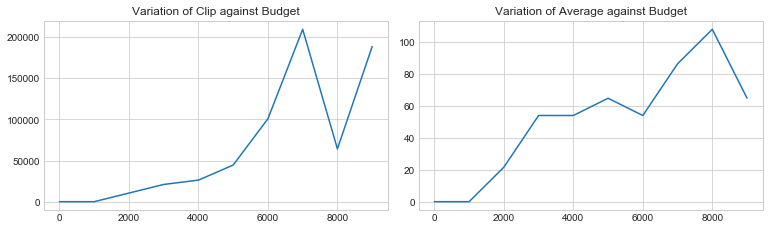

In [25]:
# running the custom function 100 times to arrive at a clipping param for the data from Question 14
custom_clips = []
i_s = []
mean_s = []
data = adult_data['Capital Gain'].tolist()
from tqdm import tqdm
for i in tqdm(range(1, 10000, 1000)):
    i_s.append(i)
    temp_sum = 0
    temp_mean = 0
    for j in range(100):
        m, p = auto_avg(data, i)
        temp_sum += p
        temp_mean += m
    custom_clips.append(temp_sum/100)
    mean_s.append(temp_mean/100)
fig = plt.figure()
fig.set_size_inches(16, 12)
ax = fig.add_subplot(4,3,1)
ax.plot(i_s, custom_clips)
ax.set_title("Variation of Clip against Budget")
ax = fig.add_subplot(4,3,2)
ax.plot(i_s, mean_s)
ax.set_title("Variation of Average against Budget")

plt.tight_layout()
plt.show()


100%|██████████| 100/100 [00:17<00:00,  5.72it/s]


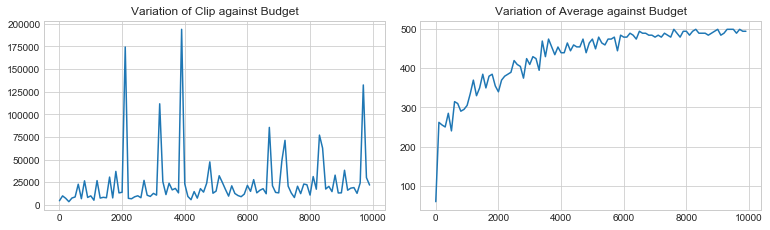

In [26]:
# running the custom function 100 times to arrive at a clipping param for the sample data
custom_clips = []
i_s = []
mean_s = []

array_test = []
for  i  in range(1000):
    array_test.append(i)
from tqdm import tqdm
for i in tqdm(range(1, 10000, 100)):
    i_s.append(i)
    temp_sum = 0
    temp_mean = 0
    for j in range(100):
        m, p = auto_avg(array_test, i)
        temp_sum += p
        temp_mean += m
    custom_clips.append(temp_sum/100)
    mean_s.append(temp_mean/100)
fig = plt.figure()
fig.set_size_inches(16, 12)
ax = fig.add_subplot(4,3,1)
ax.plot(i_s, custom_clips)
ax.set_title("Variation of Clip against Budget")
ax = fig.add_subplot(4,3,2)
ax.plot(i_s, mean_s)
ax.set_title("Variation of Average against Budget")

plt.tight_layout()
plt.show()

#### Will your approach work well for all datasets? If not, describe a dataset for which it is likely to return very inaccurate results.

* This approach doesn't work well for datasets with high skewness. For example: the capital gain data where is majority of the values are zero and the remaining values are very high. 
* This also does not work with negative data (assumption).
* This works well with random data and uniform data.

>> +8 points

### Question 18 (3 points)

Consider the code below, which graphs the total privacy cost of an averaging attack under (1) sequential composition and (2) advanced composition, for values of `k` between 1 and 200.

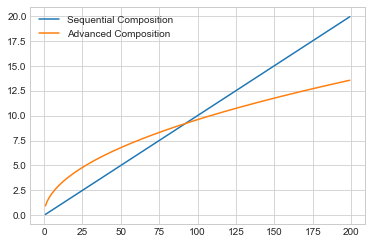

In [28]:
epsilon = .1
delta_p = 1e-5

def query():
    return len(adult_data[adult_data['Martial Status'] == 'Divorced'])

def avg_attack(k):
    return np.mean([laplace_mech(query(), 1, epsilon) for i in range(k)])
    
xs = range(1, 200)
privacy_cost_sequential = [k * epsilon for k in xs]
privacy_cost_advanced = [2 * epsilon * np.sqrt(2 * k * np.log(1/delta_p)) for k in xs]

plt.plot(xs, privacy_cost_sequential, label='Sequential Composition');
plt.plot(xs, privacy_cost_advanced, label='Advanced Composition');
plt.legend()

In 2-5 sentences, answer the following:
- At approximately what point do the lines representing the two approaches cross? What does this mean about **which** composition technique should be used for an iterative algorithm?
- The two lines represent **different** privacy costs for the **same** algorithm. How can both be correct?

* I've added the labels for the graphs. They were not present in the question. 
* The lines cross at k = 90. Sequential composition yields a better privacy cost before 90. Advanced composition has a better cost post 90. Hence, Sequential composition should be used if there are less than 90 mechanisms. Advanced compositon for greater than or equal to 90 mechanisms. 
* Sequential composition is a loose bound whereas, the advanced composition is more tightly bound. Also, advanced composition has a delta parameter which is not present in sequential composition.


>> +3 points

### Question 19 (3 points)

In the cell below, define a function that implements the vector version of the Laplace mechanism. An implementation that works for a single number is defined for reference as `laplace_mech` above.

In [29]:
def laplace_mech_vec(qs, sensitivity, epsilon):
    '''
    Vector version of Laplace Mech
    '''
    # Invoke Laplace once and sample the required values
    return qs + np.random.laplace(loc=0, scale=sensitivity / epsilon, size = len(qs)) 

>> +3 points

### Question 20 (3 points)

In the cell below, define a function that implements the vector version of the Gaussian mechanism. An implementation that works for a single number is defined for reference as `gaussian_mech` above.

In [30]:
def gaussian_mech(v, sensitivity, epsilon, delta):
    sigma = sensitivity * np.sqrt(2 * np.log(1.25 / delta)) / epsilon
    return v + np.random.normal(loc=0, scale = sigma)


def gaussian_mech_vec(qs, sensitivity, epsilon, delta):
    '''
    Vector version of Gaussian Mech
    '''
    sigma = sensitivity * np.sqrt(2 * np.log(1.25 / delta)) / epsilon
    # Invoke Gaussian once and sample the required values
    return qs + np.random.normal(loc=0, scale=sigma, size=len(qs))

>> +3 points

### Question 21 (4 points)

Consider the code below, which defines three average queries and runs them on `adult_data`, using the Laplace mechanism to provide differential privacy with $\epsilon = 1$ for each query.

In [31]:
b_capgain = 3000
b_year = 3000
b_age = 3000

epsilon = 1
n = len(adult_data)

def query1():
    return np.sum(z_clip(adult_data['Capital Gain'], b_capgain))/n

def query2():
    return np.sum(z_clip(adult_data['DOB'].dt.year, b_year))/n

def query3():
    return np.sum(z_clip(adult_data['Age'], b_age))/n

def my_query():
    return [query1(), query2(), query3()]

my_query()

[235.98968090660605, 1981.2278185559412, 38.58164675532078]

In 2-5 sentences, answer the following:
- What is the $L_1$ sensitivity of `my_query`, and why?
- What is the $L_2$ sensitivity of `my_query`, and why?

* $L_1$ sensitivity of my_query is 0.2764. Since  'n' is not being queried, the sensitivity of the average query becomes $max / n$. Max is the clipping bound range (Here it is 3,000). Hence the overall sensitivity is $3000/n * 3 = 9000/32561 = 0.2764$
* $L_2$ sensitivity of my_query is 0.1595. $L_2$ sensitivity is the square root of the sum of the squares of individual sensitivities. 

>> +4 points

### Question 22 (6 points)

In the cell below, write code to release the results of calling `my_query()` with differential privacy, without using sequential composition.

*Hint*: use `laplace_mech_vec`, but be careful of sensitivity!

In [33]:
# Sensitivity will be the L1 Sensitivity
laplace_mech_vec(my_query(), 0.2764, epsilon)

array([ 236.22302466, 1981.07400172,   38.62858608])

>> +6 points

### Question 23 (4 points)

In 2-5 sentences, answer the following:
- What is the total privacy cost of your answer to Question 22, and why?

Privacy Cost is $ \epsilon $. This is not sequential composition. We invoke Laplace only once and we sample 3 values from it. 

### Question 24 (6 points)

In the cell below, write code to release the results of `my_query()` with differential privacy, but using the Gaussian mechanism.

In [35]:
# using L2 sensitivity and a delta of 1e-5
gaussian_mech_vec(my_query(), 0.1595, epsilon, 1e-5)

array([ 236.12616633, 1981.17146782,   38.01373164])

### Extra Credit

You may earn up to 10 points of extra credit on this homework by providing *narrated proofs* of the Sequential and Parallel Composition Theorems (Week 8 lecture, slide 16). You must prove the Theorems as they are stated on the slide, following the same notation. Understanding that these proofs are well-known and you may look them up, I am requesting that you *narrate* your proof completely.  That is, for each step in the proof, provide narrative justification for this step. The proof of each Theorem will be graded on a 5 point scale.

You should upload your proofs as a separate file. Please type your responses. You may use LaTeX or Word. The same collaboration guidelines apply here. You are required to work indepedently.

In [8]:
# Please submit your reponses via separate file.